install notebook extensions: pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user

list of laTex mathematical symbols
https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import  statsmodels.stats.multitest as multitest
import itertools

import seaborn as sns
# plotly.offline.init_notebook_mode(connected=True)
# Standard plotly imports
import plotly.plotly as py
import pandas as pd
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

from tqdm import tnrange, tqdm_notebook
plotly.io.orca.config.port = 8999

from plotly import tools
# cufflinks binds plotly directly to python dataframe
import cufflinks as cf
cf.go_offline()
# # Set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)
# plotly.offline.init_notebook_mode(connected=True)


%matplotlib inline
%reload_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# read text in files as a list of texts 

In [40]:
path = '/projects/trans_scratch/validations/workspace/szong/development/fastai/courses/ml1/data/aclImdb/train/neg/'
fs = ['12265_1.txt', '12264_1.txt']
txts = []
for f in fs:
    fname = f'{path}{f}'
    with open(fname) as fh:
        txts.append(fh.read())

txts

['The special effects of this movie are, especially for its time, laughable and used in such an over-emphasized way that you can\'t deny their terrible existance.<br /><br />The acting redefines the term "terrible overacting" at the hands of Meg Foster and Richard Joseph Paul, where julie Newman and Andrew Divoff just redefine "bad".<br /><br />***spoilers***<br /><br />The charm in this movie can be found in two things: First is the excellent casting of Carel "Lurch" Struycken as the mysterious psychic Gaunt, who can sense where and when people will die and is always there.<br /><br />The second are original finds, the combination SF-Western is obviously original, if terrible, but other finds are more original, like the gunman Zack Stone being able to sense the pain of the people he shoots (though his acting falls short here).<br /><br />Overal...don\'t see this movie, except if you love that ol\' hunk-o-brutal Carel Struycken, as any self-respecting Dutchman should.',
 "You get 5 wri

# useful numpy functions: sign, clip, nonzero, argmax, argsort 

In [60]:
a = np.array([-5.3, 5.4, 0.1, -0.2, 0, 0])
np.sign(a)


np.clip(a, -2, 3)

np.nonzero(a)
a[np.nonzero(a)]

np.argmax(a)
a[np.argmax(a)]

np.argsort(a)
a[np.argsort(a)]

# ndarray inplace operation
a.sort()
a
a.fill(100)
a

# generate synthetic dataset

array([-1.,  1.,  1., -1.,  0.,  0.])

array([-2. ,  3. ,  0.1, -0.2,  0. ,  0. ])

(array([0, 1, 2, 3]),)

array([-5.3,  5.4,  0.1, -0.2])

1

5.4

array([0, 3, 4, 5, 2, 1])

array([-5.3, -0.2,  0. ,  0. ,  0.1,  5.4])

array([-5.3, -0.2,  0. ,  0. ,  0.1,  5.4])

array([100., 100., 100., 100., 100., 100.])

# generate synthetic dataset

In [1]:
import numpy as np

In [ ]:
np.linspace()

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

array([-0.03135407, -0.11814905,  0.14586559, -0.04239754,  0.16058562,
       -0.05277152,  0.10170596, -0.00888891,  0.19051268,  0.0203645 ,
        0.3097905 ,  0.04893543,  0.33457591,  0.10317423,  0.35499112,
        0.48008651,  0.37169467,  0.30716088,  0.31143893,  0.35979426,
        0.60311788,  0.5898593 ,  0.5409102 ,  0.54906796,  0.53380142,
        0.55232376,  0.55209233,  0.66242741,  0.58648964,  0.6274728 ,
        0.76066367,  0.54772801,  0.53610087,  0.85922766,  0.7635116 ,
        0.73061079,  0.85773251,  0.72330783,  0.58765447,  0.98966587,
        0.64534461,  0.89153296,  0.69251614,  0.68548496,  0.84034004,
        1.00092404,  0.9832276 ,  1.07908551,  0.92975307,  0.93793445])

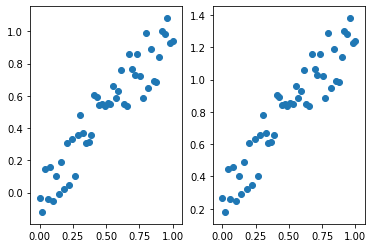

In [59]:
x = np.linspace(0,1);x # default num=50
y = x + np.random.uniform(-0.2, 0.2, x.shape);y
# y = x + np.random.normal(-0.2, 0.2, x.shape);y
f, ax = plt.subplots(1,2)
ax[0].scatter(x, y)
ax[1].scatter(x, y+0.3)

# get indices of an array

In [17]:
x = np.random.normal(3, 1, 5);x
x > 3
np.nonzero(x > 3) # return the index of element where the expression is true
x[np.nonzero(x >3)]

array([3.80766021, 2.26049249, 2.97646435, 3.10068452, 4.06445499])

array([ True, False, False,  True,  True])

(array([0, 3, 4]),)

array([3.80766021, 3.10068452, 4.06445499])

# bootstrap

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/

bootstrap is a sampling techincal: random sampling with replacement. so in one bootstrap sample, the one sample may appear 0, 1, or more times. 

example: draw 3 samples from [0,1,2,3,4,5], bootstrapping works as follow:
* drop one sample first, for example, 2, then place 2 back. 
* draw second sample, for example 5, place 5 back
* draw thrid dample, for example 2.

so the sample drawn is [2,5,2]

In [15]:
np.arange(5) # return an array, has no np.range
np.arange(10).reshape(2,5)
list(np.arange(10).reshape(2,5)) # not recursive
np.arange(10).reshape(2,5).tolist() # tolist() is recursive
range(5) # range
list(range(5)) # a list

array([0, 1, 2, 3, 4])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

[array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9])]

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]

range(0, 5)

[0, 1, 2, 3, 4]

In [16]:
dft = pd.DataFrame(np.arange(8).reshape(2,4))
dft.head(2)
dft[4] = [[[100, 200, 300], [44,55, 66]], [[5,6, 7]]]
dft
dft = dft.explode(4)
dft
dft[[5,6,7]] = pd.DataFrame(dft[4].values.tolist(), index=dft.index)
dft

,0,1,2,3
0,0,1,2,3
1,4,5,6,7


,0,1,2,3,4
0,0,1,2,3,"[[100, 200, 300], [44, 55, 66]]"
1,4,5,6,7,"[[5, 6, 7]]"


,0,1,2,3,4
0,0,1,2,3,"[100, 200, 300]"
0,0,1,2,3,"[44, 55, 66]"
1,4,5,6,7,"[5, 6, 7]"


,0,1,2,3,4,5,6,7
0,0,1,2,3,"[100, 200, 300]",100,200,300
0,0,1,2,3,"[44, 55, 66]",44,55,66
1,4,5,6,7,"[5, 6, 7]",5,6,7


In [22]:
pd.DataFrame(dft[4].values.tolist(), index=dft.index)

,0,1,2
0,100,200,300
0,44,55,66
1,5,6,7


### read_csv, columns, shape, and head
read demo file into a pandas dataframe, show column headers, number of rows and columns of the dataframe, show first 2 rows

In [23]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/notebook/demo.csv'
df = pd.read_csv(f)
df.columns
df.shape
df.head(2)

Index(['chr', 'start', 'end', 'patients', 'num_strelka_patients', 'gene',
       'feature_of_interest', 'num_normal_patients', 'num_mutationseq_patient',
       'Reference_Allele', 'Tumor_Seq_Allele2', 'cum_pos', 'feature_colors',
       'Clade', 'A7_count', 'A9_count'],
      dtype='object')

(174, 16)

,chr,start,end,patients,num_strelka_patients,gene,feature_of_interest,num_normal_patients,num_mutationseq_patient,Reference_Allele,Tumor_Seq_Allele2,cum_pos,feature_colors,Clade,A7_count,A9_count
0,3,183675458,183675459,S_99020;S_99120;S_99195,3,ABCC5,active_enhancer,0,5,C,T,676125452,green,A7;A9;A7,2,1
1,18,19268412,19268413,S_99120;S_99170;S_99197;S_99326;S_99354;S_9939...,8,ABHD3,active_enhancer,0,8,T,A,2600635486,green,A9;A7;A9;A7;A7;A9;A9;A9,3,5


### np.where
annotate rows based on the values in relationship between two columns. For example, if A7_count > A9_count, annotate the entry as red; otherwise assign a color of blue.

In [70]:
df['clade_colors'] = np.where((df.A7_count>df.A9_count), 'red', 'blue')
df.head(2)

,chr,start,end,patients,num_strelka_patients,gene,feature_of_interest,num_normal_patients,num_mutationseq_patient,Reference_Allele,Tumor_Seq_Allele2,cum_pos,feature_colors,Clade,A7_count,A9_count,clade_colors
0,3,183675458,183675459,S_99020;S_99120;S_99195,3,ABCC5,active_enhancer,0,5,C,T,676125452,green,A7;A9;A7,2,1,red
1,18,19268412,19268413,S_99120;S_99170;S_99197;S_99326;S_99354;S_9939...,8,ABHD3,active_enhancer,0,8,T,A,2600635486,green,A9;A7;A9;A7;A7;A9;A9;A9,3,5,blue


### pd.crosstab
crosstab can calculate frequency

1) we can count the frequency of all chromosome and hotspot type combinations

2) we can also calculate the relative frequencies across rows, columns, or all.

In [34]:
pd.crosstab??

In [12]:
pd.crosstab(index=df['chr'], columns=df['feature_of_interest']).head(2)
pd.crosstab(index=df['chr'], columns=df['feature_of_interest'], normalize='columns').head(2)
pd.crosstab(index=df['chr'], columns=df['feature_of_interest'], normalize='all').head(2)
df.pivot_table(index='chr', columns='feature_of_interest', aggfunc='size').head(2)

feature_of_interest,active_enhancer,other,potential_promoter
chr,,,
1,2,12,0
2,0,13,1


feature_of_interest,active_enhancer,other,potential_promoter
chr,,,
1,0.083333,0.086957,0.000000
2,0.000000,0.094203,0.083333


feature_of_interest,active_enhancer,other,potential_promoter
chr,,,
1,0.011494,0.068966,0.000000
2,0.000000,0.074713,0.005747


feature_of_interest,active_enhancer,other,potential_promoter
chr,,,
1,2.0,12.0,NaN
2,NaN,13.0,1.0


### merge two dataframe based on multiple columns

In [71]:
dff = pd.merge(df, df3, left_on=['gene', 'chr', 'start_x', 'Reference_Allele', 'Tumor_Seq_Allele2'], 
               right_on=['gene', 'chr', 'start_x', 'Reference_Allele', 'Tumor_Seq_Allele2'], how='left')


NameError: name 'df3' is not defined

### modify values in a column, use map or regex
 map a column to a new column with different values based on a predifined dictionary 
 
 regex can be very powerful: https://docs.python.org/2/library/re.html

In [ ]:
df['indel_colors'] = df.KRAS_snvs_indels.map({'N':'grey', 'Y':'red', 'germline':'black'})
dfn['patients_new'] = list(map(lambda x: x.replace('_T', ''), s))


In [ ]:
df_cov.loc['clinical_stage',:] = df_cov.loc['clinical_stage',:].str.replace('[AB]\d*', '')

In [ ]:
# wide to long transformation, break entries in a column into multiple rows 
# string split to expand a dataframe to long form by splitting values in a column
s = df.patients.str.split(';', expand=True).stack()
idx = s.index.get_level_values(0)
dfn = df.loc[idx]
dfn['new_col'] = list(s)


In [ ]:
df['cumsum_num_strelka'] = df.sort_values(['chr', 'start_x']).num_strela_patients.cumsum()
# cumulative sum is useful, for example calculate the cumulative genome positions when plotting events along the genome

In [ ]:
p = np.argmax(p_matrix, axis=1)
# get the index of max value in a ndarray

### groupby and aggregate
groupby_aggregate is a powerful way to manipulate data. For instance, to get the mean, minimum, maxmum, and standard deviation of the aggregated series. The syntax is df.groupby(['group col1', 'group col2].agg({'aggregate col1':[min, max, std], 'aggregate col2':[agg_func1, agg_func2]}). This gives you a both row and column multiindexed dataframe. you could rename the columns and reset the index to flatten the index so that following manipulation is easier.

In [ ]:
df3 = df2.astype(str).groupby(['gene', 'chr', 'start_x', 'Reference_Allele', 'Tumor_Seq_Allele2']).\
agg({'hiv_status':[';'.join, count_pos, count_neg], 'previous_final_hist':';'.join, \
     'Clade':[';'.join, count_A7, count_A9]}).reset_index()
df3.head(3)


In [ ]:
df2['barcode'] = df2[['Sentrix Barcode', 'Sample Section']].astype(str).apply(lambda x: '_'.join(x), axis=1) 
dfy['region'] = dfy[['Chrom', 'left', 'right']].astype(str).apply(lambda x: x[0]+':'+x[1]+'-'+x[2], axis=1)
# join two columns

In [ ]:
barcode_dict = pd.Series(df2.sample_id.values,index=df2.barcode).to_dict()
# fastest way to convert two df columns to a dictionary

In [ ]:
dfy = dfy[~dfy.pos.astype(str).str.contains('\(')]
# drop rows based on values in a column that matches a pattern
# replace only a few values in a column, you can give a list of things you would like to be replaced
df['chr'] = df['chr'].replace(['X'], 23)

pivot, pivot_table, and crosstab, crosstab is a function, not a pandas method
1) pivot only reshapes dataframe, does not aggregate. can always be replaced by pivot_table

2) always use pivot_table, need to provide aggfunc even if you just want to reshape the data

In [36]:
def times100(x):
    return 100*x
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/notebook/animals_long.txt')
df.head(2)
df

,alphas,species,prevalence
0,[0.1 0.1 0.1],lions,0.492063
1,[1 1 1],lions,0.444444


,alphas,species,prevalence
0,[0.1 0.1 0.1],lions,0.492063
1,[1 1 1],lions,0.444444
2,[5 5 5],lions,0.380952
3,[15 15 15],lions,0.352941
4,[0.1 0.1 0.1],tigers,0.333333
5,[1 1 1],tigers,0.333333
6,[5 5 5],tigers,0.333333
7,[15 15 15],tigers,0.333333
8,[0.1 0.1 0.1],bears,0.174603
9,[1 1 1],bears,0.222222


In [40]:
df2 = df.pivot(index='alphas', columns='species', values='prevalence').reset_index()
df2

species,alphas,bears,lions,tigers
0,[0.1 0.1 0.1],0.174603,0.492063,0.333333
1,[1 1 1],0.222222,0.444444,0.333333
2,[15 15 15],0.313725,0.352941,0.333333
3,[5 5 5],0.285714,0.380952,0.333333


In [42]:
pd.melt(df2, id_vars='alphas', value_vars=['bears', 'lions'], value_name='ori_prevalence', var_name='animals')

,alphas,animals,ori_prevalence
0,[0.1 0.1 0.1],bears,0.174603
1,[1 1 1],bears,0.222222
2,[15 15 15],bears,0.313725
3,[5 5 5],bears,0.285714
4,[0.1 0.1 0.1],lions,0.492063
5,[1 1 1],lions,0.444444
6,[15 15 15],lions,0.352941
7,[5 5 5],lions,0.380952


In [38]:
# pivot a table, pivot_table?
df3 = df.pivot_table(index='alphas', columns='species', values='prevalence', aggfunc=lambda x:x)# aggfunc=times100)
df3

species,bears,lions,tigers
alphas,,,
[0.1 0.1 0.1],0.174603,0.492063,0.333333
[1 1 1],0.222222,0.444444,0.333333
[15 15 15],0.313725,0.352941,0.333333
[5 5 5],0.285714,0.380952,0.333333


In [43]:
### pivot_table for non-numerical values, long to wide transformation
df1 = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/validation/strelka_classic_vcf_files.txt.test')
df1.head(2)

,patient,vcf,type
0,HTMCP-03-06-02025,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,indels
1,HTMCP-03-06-02025,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,snvs


In [44]:
# both works, pivot_table for non_numerical values, long to wide transformation
# df2 = pd.pivot_table(df1, index='patient', columns='type', values='vcf', aggfunc=lambda x: str(x.values[0])).reset_index()
df2 = pd.pivot_table(df1, index='patient', columns='type', values='vcf', aggfunc=lambda x: ''.join([str(v) for v in x])).reset_index()
df2.columns = ['patient', 'indels', 'snvs']
df2.head(2)

,patient,indels,snvs
0,HTMCP-03-06-02025,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...
1,HTMCP-03-06-02044,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...


In [6]:

df2 = pd.pivot_table(df1, index='patient', columns='type', values='vcf', aggfunc=lambda x: ''.join([str(v) for v in x])).reset_index()

Index(['chr', 'start', 'end', 'patients', 'num_strelka_patients', 'gene',
       'feature_of_interest', 'num_normal_patients', 'num_mutationseq_patient',
       'Reference_Allele', 'Tumor_Seq_Allele2', 'cum_pos', 'feature_colors',
       'Clade', 'A7_count', 'A9_count'],
      dtype='object')

(174, 16)

,chr,start,end,patients,num_strelka_patients,gene,feature_of_interest,num_normal_patients,num_mutationseq_patient,Reference_Allele,Tumor_Seq_Allele2,cum_pos,feature_colors,Clade,A7_count,A9_count
0,3,183675458,183675459,S_99020;S_99120;S_99195,3,ABCC5,active_enhancer,0,5,C,T,676125452,green,A7;A9;A7,2,1
1,18,19268412,19268413,S_99120;S_99170;S_99197;S_99326;S_99354;S_9939...,8,ABHD3,active_enhancer,0,8,T,A,2600635486,green,A9;A7;A9;A7;A7;A9;A9;A9,3,5


### melt and stack
1) melt and stack reshape data in exactly the same way.

2) melt: two parameters, id_vars which are the column names that are to remain vertical (and not reshaped) and value_vars which are the column names to be reshaped into a single column.

3) use melt over stack because melt allows you to rename columns and avoids multiindex.


In [2]:
# melt wide form to long form, it is like unpivot. pivot long to wide
value_df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/notebook/animals.txt')
print(value_df)
melted = pd.melt(value_df, id_vars = 'alphas', value_vars=['lions', 'tigers', 'bears'], value_name='prevalence',
        var_name = 'species')
print(melted)

      lions    tigers     bears         alphas
0  0.492063  0.333333  0.174603  [0.1 0.1 0.1]
1  0.444444  0.333333  0.222222        [1 1 1]
2  0.380952  0.333333  0.285714        [5 5 5]
3  0.352941  0.333333  0.313725     [15 15 15]
           alphas species  prevalence
0   [0.1 0.1 0.1]   lions    0.492063
1         [1 1 1]   lions    0.444444
2         [5 5 5]   lions    0.380952
3      [15 15 15]   lions    0.352941
4   [0.1 0.1 0.1]  tigers    0.333333
5         [1 1 1]  tigers    0.333333
6         [5 5 5]  tigers    0.333333
7      [15 15 15]  tigers    0.333333
8   [0.1 0.1 0.1]   bears    0.174603
9         [1 1 1]   bears    0.222222
10        [5 5 5]   bears    0.285714
11     [15 15 15]   bears    0.313725


In [3]:
# use stack can achieve identical results, stack works with index
value_df.set_index('alphas').stack()

alphas               
[0.1 0.1 0.1]  lions     0.492063
               tigers    0.333333
               bears     0.174603
[1 1 1]        lions     0.444444
               tigers    0.333333
               bears     0.222222
[5 5 5]        lions     0.380952
               tigers    0.333333
               bears     0.285714
[15 15 15]     lions     0.352941
               tigers    0.333333
               bears     0.313725
dtype: float64

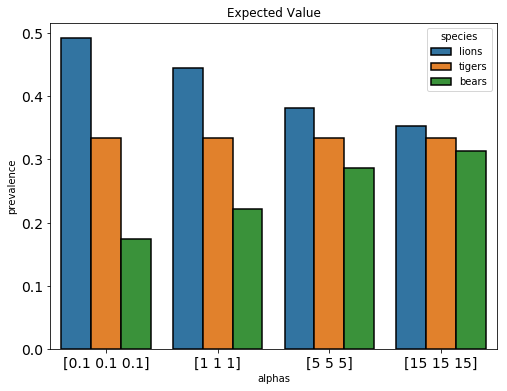

In [4]:
# melted.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/notebook/animals_long.txt', index=False)
plt.figure(figsize = (8, 6))
sns.barplot(x = 'alphas', y = 'prevalence', hue = 'species', data = melted,
            edgecolor = 'k', linewidth = 1.5);
plt.xticks(size = 14); 
plt.yticks(size = 14)
plt.title('Expected Value');

minimal sufficient python apis: will go through them at some point
Attributes
columns
dtypes
index
shape
T
values

Aggregation Methods
all
any
count
describe
idxmax
idxmin
max
mean
median
min
mode
nunique
sum
std
var

Non-Aggretaion Statistical Methods
abs
clip
corr
cov
cummax
cummin
cumprod
cumsum
diff
nlargest
nsmallest
pct_change
prod
quantile
rank
round

Subset Selection
head
iloc
loc
tail

Missing Value Handling
dropna
fillna
interpolate
isna
notna

Grouping
expanding
groupby
pivot_table
resample
rolling

Joining Data
append
merge

Other
asfreq
astype
copy
drop
drop_duplicates
equals
isin
melt
plot
rename
replace
reset_index
sample
select_dtypes
shift
sort_index
sort_values
to_csv
to_json
to_sql
Functions
pd.concat
pd.crosstab
pd.cut
pd.qcut
pd.read_csv
pd.read_json
pd.read_sql
pd.to_datetime
pd.to_timedelta

### removed duplicate index, this works for multiple index as well

In [61]:
# use gistic refgenefile including both the cytoband and ref genes
f1 = '/projects/da_workspace/software/gistic/rg.txt'
df1 = pd.read_csv(f1)
df1.head(2)
# df1 = df1.set_index(['chrn', 'start', 'nd'])
df1.shape

,refseq,gene,symb,locus_id,chr,strand,start,nd,cds_start,cds_end,status,chrn
0,NM_000014,alpha-2-macroglobulin precursor,A2M,2,chr12,0,9220303,9268558,9220418,9268445,Reviewed,12
1,NM_000015,arylamine N-acetyltransferase 2,NAT2,10,chr8,1,18248754,18258723,18257513,18258386,Reviewed,8


(40430, 12)

In [62]:
s = pd.Series(df1.head(700).index.duplicated())
s[s].index

Int64Index([], dtype='int64')

In [67]:
df1.iloc[607:615]
df1[df1.nd == 169680843]

,refseq,gene,symb,locus_id,chr,strand,start,nd,cds_start,cds_end,status,chrn
607,NM_000643,glycogen debranching enzyme isoform 1,AGL,178,chr1,1,100316044,100389579,100316598,100387207,Reviewed,1
608,NM_000644,glycogen debranching enzyme isoform 1,AGL,178,chr1,1,100316044,100389579,100316598,100387207,Reviewed,1
609,NM_000645,glycogen debranching enzyme isoform 2,AGL,178,chr1,1,100326765,100389579,100327027,100387207,Reviewed,1
610,NM_000646,glycogen debranching enzyme isoform 3,AGL,178,chr1,1,100316530,100389579,100318225,100387207,Reviewed,1
611,NM_000651,complement receptor type 1 isoform S precursor,CR1,1378,chr1,1,207669472,207815110,207669612,207812754,Reviewed,1
612,NM_000655,L-selectin precursor,SELL,6402,chr1,0,169659805,169680843,169660924,169680678,Reviewed,1
613,NM_000657,apoptosis regulator Bcl-2 beta isoform,BCL2,596,chr18,0,60985186,60986613,60985281,60985899,Reviewed,18
614,NM_000658,autoimmune regulator isoform 2,AIRE,326,chr21,1,45710273,45718110,45710689,45717610,Reviewed,21


,refseq,gene,symb,locus_id,chr,strand,start,nd,cds_start,cds_end,status,chrn
612,NM_000655,L-selectin precursor,SELL,6402,chr1,0,169659805,169680843,169660924,169680678,Reviewed,1


In [41]:
df1.loc[~df1.index.duplicated(keep='first')].shape

,refseq,gene,symb,locus_id,chr,strand,start,nd,cds_start,cds_end,status,chrn
0,NM_000014,alpha-2-macroglobulin precursor,A2M,2,chr12,0,9220303,9268558,9220418,9268445,Reviewed,12
1,NM_000015,arylamine N-acetyltransferase 2,NAT2,10,chr8,1,18248754,18258723,18257513,18258386,Reviewed,8


(40430, 9)

(29556, 9)

### use pd.cut to bin continuous values

In [40]:
# binning a column with continuous values into a categorical value
import seaborn as sns
import time
import pandas as pd

data = sns.load_dataset('iris')

class_list = pd.cut(x=data.petal_length,
                   bins=[0, 2, 5, 100],
                   include_lowest=True,
                   labels=[1, 2, 3]).astype(int)
class_list[:3]

0    1
1    1
2    1
Name: petal_length, dtype: int64

#### seaborn cmap

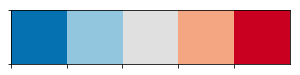

In [25]:
# you can just give a list of colors
cmap = ['#0571b0', '#92c5de','#e0e0e0', '#f4a582', '#ca0020']
sns.palplot(cmap)

In [36]:
# select columns based on values in a row, use series selection or transpose the df first
mutation_f = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/118_patients_old_vcfs/smgs_reviewed_details_with_frequency.txt.20190104'
df = pd.read_csv(mutation_f, index_col='gene')
df.head(2)
s = df.loc['Putative_histology',:] == 'Adenosquamous'
s[:3]
s[s].index
df[s[s].index].head()

,hiv_pos_mfreq,hiv_neg_mfreq,mfreq,HTMCP-03-06-02260,HTMCP-03-06-02428,HTMCP-03-06-02139,HTMCP-03-06-02240,HTMCP-03-06-02262,HTMCP-03-06-02001,HTMCP-03-06-02411,...,HTMCP-03-06-02326,HTMCP-03-06-02185,HTMCP-03-06-02222,HTMCP-03-06-02197,HTMCP-03-06-02194,HTMCP-03-06-02332,HTMCP-03-06-02156,HTMCP-03-06-02046,HTMCP-03-06-02008,HTMCP-03-06-02037
gene,,,,,,,,,,,,,,,,,,,,,
HIV_status,100,100,102,Positive,Positive,Positive,Positive,Positive,Positive,Positive,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative
Putative_histology,100,100,102,Squamous,Squamous,Adeno,Squamous,Squamous,Squamous,Squamous,...,Adeno,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous


hiv_pos_mfreq    False
hiv_neg_mfreq    False
mfreq            False
Name: Putative_histology, dtype: bool

Index(['HTMCP-03-06-02110', 'HTMCP-03-06-02216', 'HTMCP-03-06-02203',
       'HTMCP-03-06-02176'],
      dtype='object')

,HTMCP-03-06-02110,HTMCP-03-06-02216,HTMCP-03-06-02203,HTMCP-03-06-02176
gene,,,,
HIV_status,Positive,Positive,Negative,Negative
Putative_histology,Adenosquamous,Adenosquamous,Adenosquamous,Adenosquamous
PIK3CA(35%),NaN,NaN,Non-synonymous,NaN
FAT1(19%),NaN,NaN,NaN,NaN
MLL2(15%),NaN,NaN,NaN,NaN


#### re.search?

### understand class self

In [10]:
class Rectangle:
   def __init__(self, length, breadth, unit_cost=0):
       self.length = length
       self.breadth = breadth
       self.unit_cost = unit_cost
   
   def get_perimeter(self):
       return 2 * (self.length + self.breadth)
   
   def get_area(self):
       return self.length * self.breadth
   
   def calculate_cost(self):
       area = self.get_area()
       return area * self.unit_cost
# breadth = 120 cm, length = 160 cm, 1 cm^2 = Rs 2000
r = Rectangle(160, 120, 2000)
print("Area of Rectangle: %s cm^2" % (r.get_area()))
print("Cost of rectangular field: Rs. %s " %(r.calculate_cost()))

Area of Rectangle: 19200 cm^2
Cost of rectangular field: Rs. 38400000 


to understand python object and self
https://micropyramid.com/blog/understand-self-and-__init__-method-in-python-class/

* class: a set of things (objects) having some properties in common and are different from others by type, kind, qulity etc. class is the blueprint for individual object with exactly the same behaviours.
* object: one of the instances (examples) of the class, which can perform the functionalities defined in the class.
* self: represent the instance of the class. by using self, we can access the attributes and methods of the class. 
* __init__: is the contructor, we call this reserved method to create an object from a class. It allows the class to initialize the attributes of a class.

In [24]:
string = 'ABCDCEDCXBGECDCCDXA'
sub_string = 'CDC'
def count_substring(string, sub_string):
   counts = 0
   for idx in range(len(string)-2):
        part = string[idx:idx+3]
        if part == sub_string:
            counts += 1
   return counts
count_substring(string, sub_string)

2

In [19]:
string[0:4]

'ABCD'

In [35]:
if __name__ == '__main__':
    n = int(input())
    # so student_marks is a dictionary, key is the student name, values is a list of three marks
    student_marks = {}
    for _ in range(n):
        name, *line = input().split()
        scores = list(map(float, line))
        student_marks[name] = scores
    query_name = input()
    marks = student_marks[query_name]
    average_mark = sum(marks)/len(marks)
    print("{0:.2f}".format(average_mark))
# main()

b


ValueError: invalid literal for int() with base 10: 'b'

In [43]:
print("{0:.2f}".format(5.0))

5.00


In [41]:
print(":.2f".ormat(5.0))

0:.2f


In [46]:
string = 'iamsmartateverything'
position = 3
character = 'KKKKK'
def mutate_string(string, position, character):
    l = list(string)
    l[position] = character 
    s = ''.join(l) 
    return s
mutate_string(string, position, character)

'iamKKKKKmartateverything'

In [ ]:
def show_this(astring):
    print(s) # this is wrong because s comes from nowhere
    print(astring) # this is correct because when you call function show_this you have to specify what astring is
show_this('iamsmart')

In [47]:
math.sqrt(5)

2.23606797749979

In [50]:
a = ['a', 'b', 'c']
b, *c = a


In [52]:
b
c

'a'

['b', 'c']

### ok this is the formatting you can do in notebook.

this is a **test** cell. you can add a [link](https://docs.python.org/3/tutorial/classes.html#a-first-look-at-classes) there. sometimes, you would like to use a *italics* format. i am not sure what `inline really` means.
>Also, you can blockquote somethiend.ffffffffffffffffffff aaaaaaaaaaaaaaaa aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa dkdfjdfjd

In [41]:
arr = [50005, 33, -551,2,3,50000, 50000, 4,55555, 55555, 5, 5]

def second(arr):
    largest = -100000000
    second = -10000000
    for idx in range(len(arr)):
        num = arr[idx]
        if num > largest:
            second = largest
            largest = num
        elif num == largest:
            pass # means do nothing
        elif num > second:
            second = num
        print(largest, second)
    return second
second(arr)

50005 -100000000
50005 33
50005 33
50005 33
50005 33
50005 50000
50005 50000
50005 50000
55555 50005
55555 50005
55555 50005
55555 50005


50005

In [49]:
sorted(np.unique(n), reverse=True)

[5, 4, 3, 2, 1]

In [45]:
n = [1,2,3,4,5, 5, 5]
a = sorted(list(set(n)), reverse=True)
a[1]


4